<a href="https://colab.research.google.com/github/KaushikDasarii/kaushik/blob/main/Adaboost_ML_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 BEFORE Hyperparameter Tuning
Accuracy: 0.81
Precision: 0.75
Recall: 0.8522727272727273
F1 Score: 0.7978723404255319
ROC AUC Score: 0.8759131493506493

 AFTER Hyperparameter Tuning
Best Parameters: {'learning_rate': 1, 'n_estimators': 100}
Accuracy: 0.815
Precision: 0.7524752475247525
Recall: 0.8636363636363636
F1 Score: 0.8042328042328042
ROC AUC Score: 0.8843344155844156


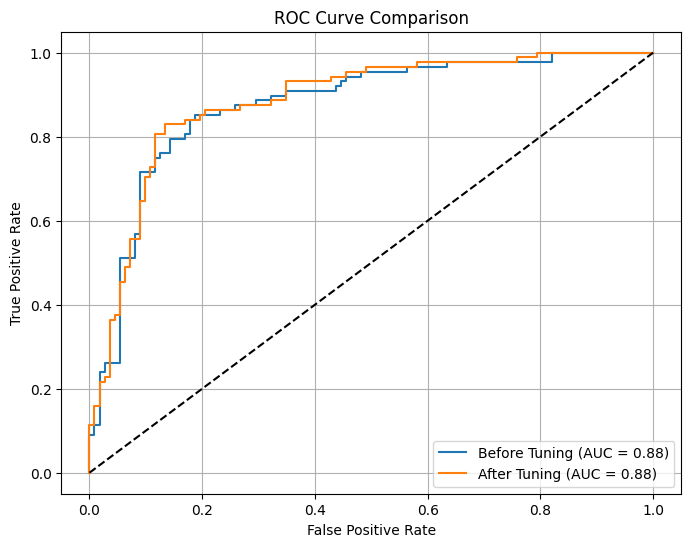

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           n_informative=15, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# Before Cross Validation
# ------------------------------
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(" BEFORE Hyperparameter Tuning")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# ------------------------------
# Hyperparameter Tuning + CV
# ------------------------------
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid,
                           cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Predict on test set
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

print("\n AFTER Hyperparameter Tuning")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_best))

# ------------------------------
# ROC Curve Plot
# ------------------------------
fpr1, tpr1, _ = roc_curve(y_test, y_proba)
fpr2, tpr2, _ = roc_curve(y_test, y_proba_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label='Before Tuning (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot(fpr2, tpr2, label='After Tuning (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_best)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()


 BEFORE Hyperparameter Tuning
MSE: 11065.20157533942
MAE: 81.92327502508687
R² Score: 0.7154563412281919

 AFTER Hyperparameter Tuning
Best Parameters: {'learning_rate': 1.0, 'n_estimators': 150}
MSE: 9109.32746806146
MAE: 74.08128211604875
R² Score: 0.7657519974611732


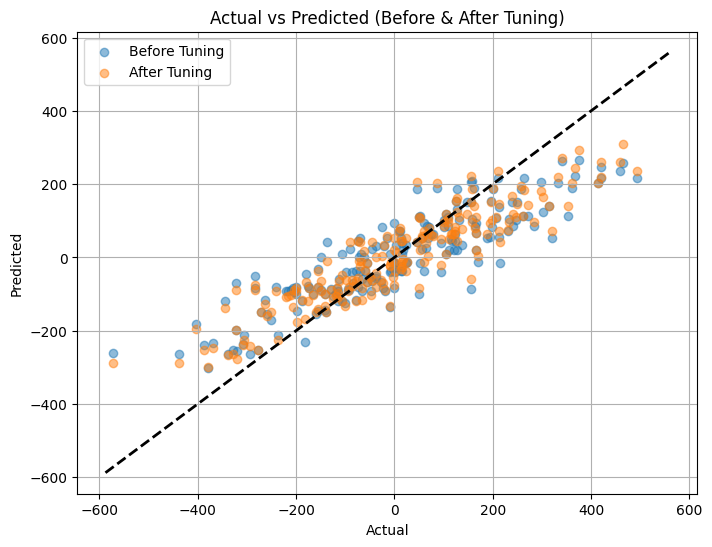

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

# Create synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=10, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Before Cross Validation

model = AdaBoostRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(" BEFORE Hyperparameter Tuning")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


# Hyperparameter Tuning + CV

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

grid_search = GridSearchCV(AdaBoostRegressor(random_state=42), param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Predict on test set with best model
y_pred_best = best_model.predict(X_test)

print("\n AFTER Hyperparameter Tuning")
print("Best Parameters:", grid_search.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("R² Score:", r2_score(y_test, y_pred_best))


# Plot Predicted vs Actual

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Before Tuning')
plt.scatter(y_test, y_pred_best, alpha=0.5, label='After Tuning')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Before & After Tuning)")
plt.legend()
plt.grid(True)
plt.show()
